<h1>Phase 3: GARCH Calibration and Volatility Assessment<h1>

#Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from datetime import timedelta
import yfinance as yf
import arch
import statsmodels.api as sm
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import chi2

In [2]:
sns.set_style("whitegrid")

plt.rc("figure", figsize=(16, 8))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

### Log Returns of Stock Indexes

In [3]:
tickers = ['^HSI']
start_date = '2007-01-01'
end_date = '2009-01-01'

data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
returns = 100 * data.Close.ffill().pct_change().dropna()
squared_returns = returns ** 2

Text(0.5, 1.0, '^HSI Returns')

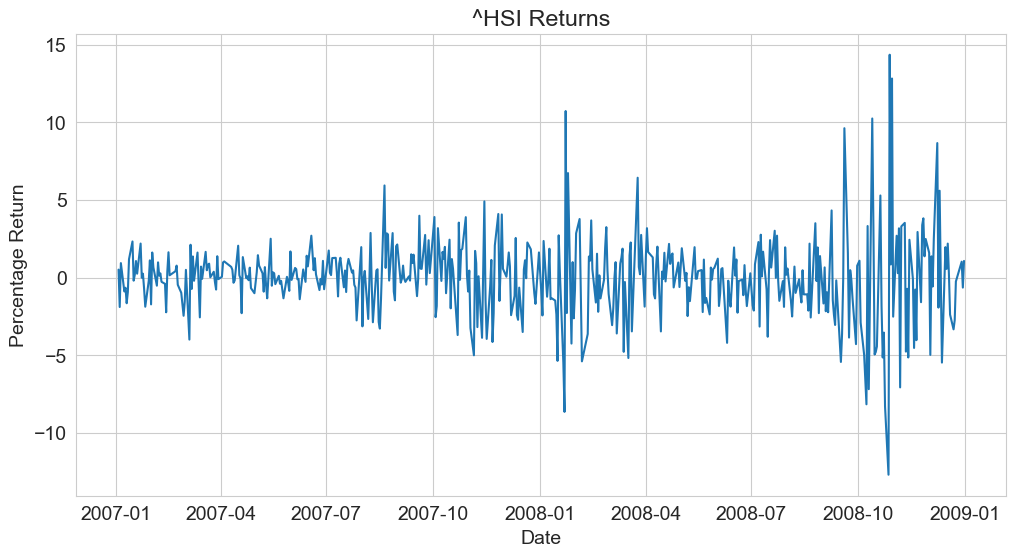

In [5]:
plt.figure(figsize=(12,6))
plt.plot(returns)
plt.ylabel('Percentage Return')
plt.xlabel('Date')
plt.title('^HSI Returns')

## ACF and PACF (Returns)

In [6]:
# Calculate ACF up to 20 lags for returns
acf_result = sm.tsa.acf(returns, nlags=20)

# Obtain ACF values at specific lags
chosen_lags = [1, 5, 10, 15, 20]
acf_chosen_lags_1 = [acf_result[lag] for lag in chosen_lags]

# Print ACF values at specific lags
for lag, acf_value in zip(chosen_lags, acf_chosen_lags_1):
    print(f"ACF at lag {lag}: {acf_value}")

ACF at lag 1: -0.08671909782797778
ACF at lag 5: -0.026811772064150533
ACF at lag 10: -0.09177079578274962
ACF at lag 15: 0.018220120770871404
ACF at lag 20: 0.031902122287217415


In [7]:
# Calculate PACF up to 20 lags for returns
pacf_result = sm.tsa.pacf(returns, nlags=20, method='ols')

pacf_chosen_lags_1 = [pacf_result[lag] for lag in chosen_lags]

# Print PACF values at specific lags
for lag, pacf_value in zip(chosen_lags, pacf_chosen_lags_1):
    print(f"PACF at lag {lag}: {pacf_value}")

PACF at lag 1: -0.08675205457840765
PACF at lag 5: -0.028860791623144415
PACF at lag 10: -0.11254755660739345
PACF at lag 15: 0.016007375592714014
PACF at lag 20: 0.022585723135223824


## ACF and PACF (Squared returns)

In [8]:
# Calculate ACF up to 20 lags for squared returns
acf_result_squared = sm.tsa.acf(squared_returns, nlags=20)

# Obtain ACF values at specific lags
chosen_lags = [1, 5, 10, 15, 20]
acf_chosen_lags = [acf_result_squared[lag] for lag in chosen_lags]

# Print ACF values at specific lags
for lag, acf_value in zip(chosen_lags, acf_chosen_lags):
    print(f"ACF at lag {lag}: {acf_value}")

ACF at lag 1: 0.35665368457253394
ACF at lag 5: 0.14321996700663492
ACF at lag 10: 0.23144028186098498
ACF at lag 15: 0.06532580246578792
ACF at lag 20: -0.006327089531296789


In [9]:
# Calculate PACF up to 20 lags for squared returns
pacf_result_squared = sm.tsa.pacf(squared_returns, nlags=20, method='ols')

pacf_chosen_lags = [pacf_result_squared[lag] for lag in chosen_lags]

# Print PACF values at specific lags
for lag, pacf_value in zip(chosen_lags, pacf_chosen_lags):
    print(f"PACF at lag {lag}: {pacf_value}")

PACF at lag 1: 0.35671994184593464
PACF at lag 5: -0.02548451482874242
PACF at lag 10: 0.10444122020593079
PACF at lag 15: -0.15875037615041998
PACF at lag 20: -0.10229878376759341


## Ljung-Box Q-Test (returns and squared returns)

In [10]:
# Perform the Ljung-Box test on original returns
lb_test_returns = acorr_ljungbox(returns, lags=20)
print('Results for original returns:', lb_test_returns)
print('--------------------------------------------------------')
# Perform the Ljung-Box test on squared returns
lb_test_squared_returns = acorr_ljungbox(squared_returns, lags=20)
print('Results for squared returns:', lb_test_squared_returns)

Results for original returns:       lb_stat  lb_pvalue
1    3.707506   0.054168
2    4.484150   0.106238
3    9.408834   0.024321
4   10.106788   0.038667
5   10.464119   0.063103
6   10.517835   0.104471
7   10.782128   0.148409
8   13.794853   0.087272
9   18.117568   0.033834
10  22.347457   0.013429
11  23.473461   0.015145
12  24.302588   0.018496
13  26.105907   0.016453
14  26.181156   0.024547
15  26.349644   0.034504
16  26.356043   0.049220
17  29.297767   0.031877
18  29.532154   0.042251
19  31.480541   0.035729
20  32.002579   0.043271
--------------------------------------------------------
Results for squared returns:        lb_stat     lb_pvalue
1    62.711293  2.393394e-15
2   145.742874  2.250801e-32
3   189.666411  7.205588e-41
4   206.573318  1.450116e-43
5   216.769242  7.310868e-45
6   222.725383  2.729268e-45
7   230.855697  3.265492e-46
8   250.467735  1.371138e-49
9   257.966659  2.071703e-50
10  284.869482  2.442936e-55
11  318.339302  1.189564e-61
12  327.272

## ACF and PACF Plots

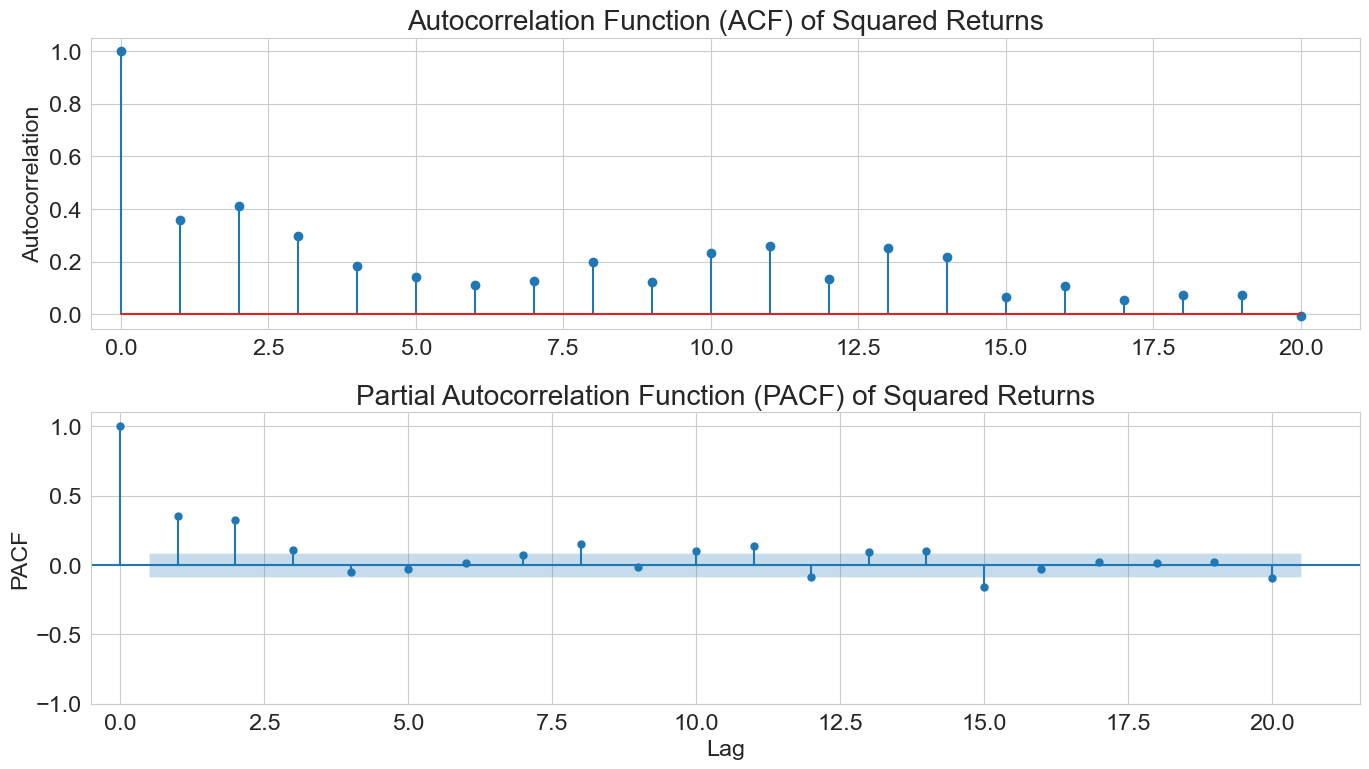

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=False)

#ACF of Squared returns
acf_result = sm.tsa.acf(squared_returns, nlags=20)  # Calculate ACF up to 20 lags
ax[0].stem(range(len(acf_result)), acf_result)
ax[0].set_title('Autocorrelation Function (ACF) of Squared Returns')
ax[0].set_ylabel('Autocorrelation')
ax[0].set_xlim(-0.5)

# PACF of squared returns
plot_pacf(squared_returns, ax=ax[1], lags=20)  # Limit to 20 lags
ax[1].set_title('Partial Autocorrelation Function (PACF) of Squared Returns')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('PACF')
ax[1].set_xlim(-0.5)
ax[1].set_ylim(-1, 1.1)

plt.tight_layout()
plt.savefig('HSI_acf_pacf_figure.png')
plt.show()

## LM ARCH(10) on Returns and Squared returns

In [12]:
# Perform LM ARCH test on returns
model_returns = arch_model(returns, vol='ARCH', mean='Zero')
results_returns = model_returns.fit(disp='off')
lm_test_returns = results_returns.arch_lm_test(lags=10)
print("LM ARCH test on returns:")
print(lm_test_returns)
print("---------------------------")

# Perform LM ARCH test on squared returns
model_squared_returns = arch_model(squared_returns, vol='ARCH', mean='Zero')
results_squared_returns = model_squared_returns.fit(disp='off')
lm_test_squared_returns = results_squared_returns.arch_lm_test(lags=10)
print("LM ARCH test on squared returns:")
print(lm_test_squared_returns)

LM ARCH test on returns:
ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 127.7080
P-value: 0.0000
Distributed: chi2(10)
---------------------------
LM ARCH test on squared returns:
ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 110.6969
P-value: 0.0000
Distributed: chi2(10)


## Fit GARCH(1,1)

In [13]:
# Create GARCH-t model
model_t = arch_model(returns, p=1, q=1, vol='Garch', dist='t')
model_n = arch_model(returns, p=1, q=1, vol='Garch')
model_skt = arch_model(returns, p=1, q=1, vol='Garch', dist='skewt')

In [14]:
model_fit_t = model_t.fit()
print("---------------------------------------------------------------------------")
model_fit_n = model_n.fit()
print("---------------------------------------------------------------------------")
model_fit_skt = model_skt.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2529.4814585555187
Iteration:      2,   Func. Count:     17,   Neg. LLF: 44011.88542831474
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1050.516275808929
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1040.9627346555199
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1175.1019070141467
Iteration:      6,   Func. Count:     49,   Neg. LLF: 1041.1148233504798
Iteration:      7,   Func. Count:     56,   Neg. LLF: 1040.7332721317362
Iteration:      8,   Func. Count:     62,   Neg. LLF: 1040.7298648200858
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1040.7212428350663
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1040.7113932793798
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1040.7050611093018
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1040.7042237158898
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1040.7041862800868
Iteration:     14,   Func. Count:     98,   Neg. LLF:

In [15]:
print(model_fit_t.summary())
print("------------------------------------------------------------------------------------")
print(model_fit_n.summary())
print("------------------------------------------------------------------------------------")
print(model_fit_skt.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1040.70
Distribution:      Standardized Student's t   AIC:                           2091.41
Method:                  Maximum Likelihood   BIC:                           2112.38
                                              No. Observations:                  490
Date:                      Fri, Mar 15 2024   Df Residuals:                      489
Time:                              18:37:29   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

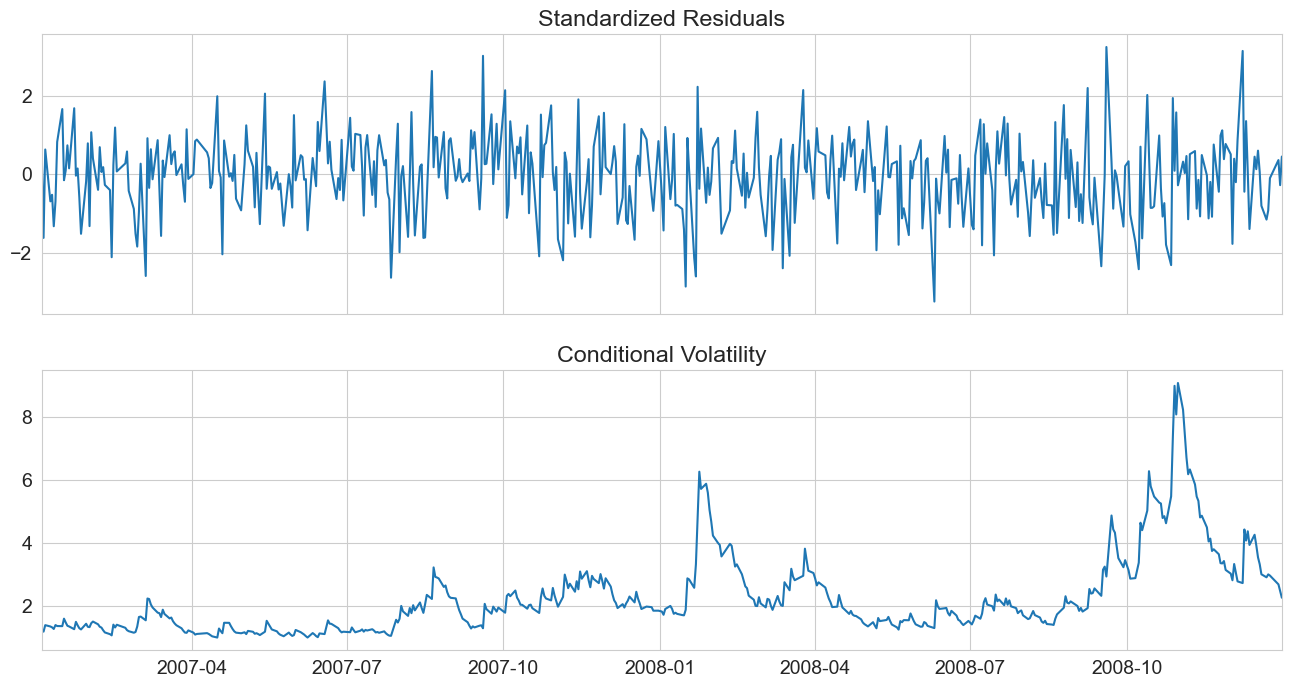

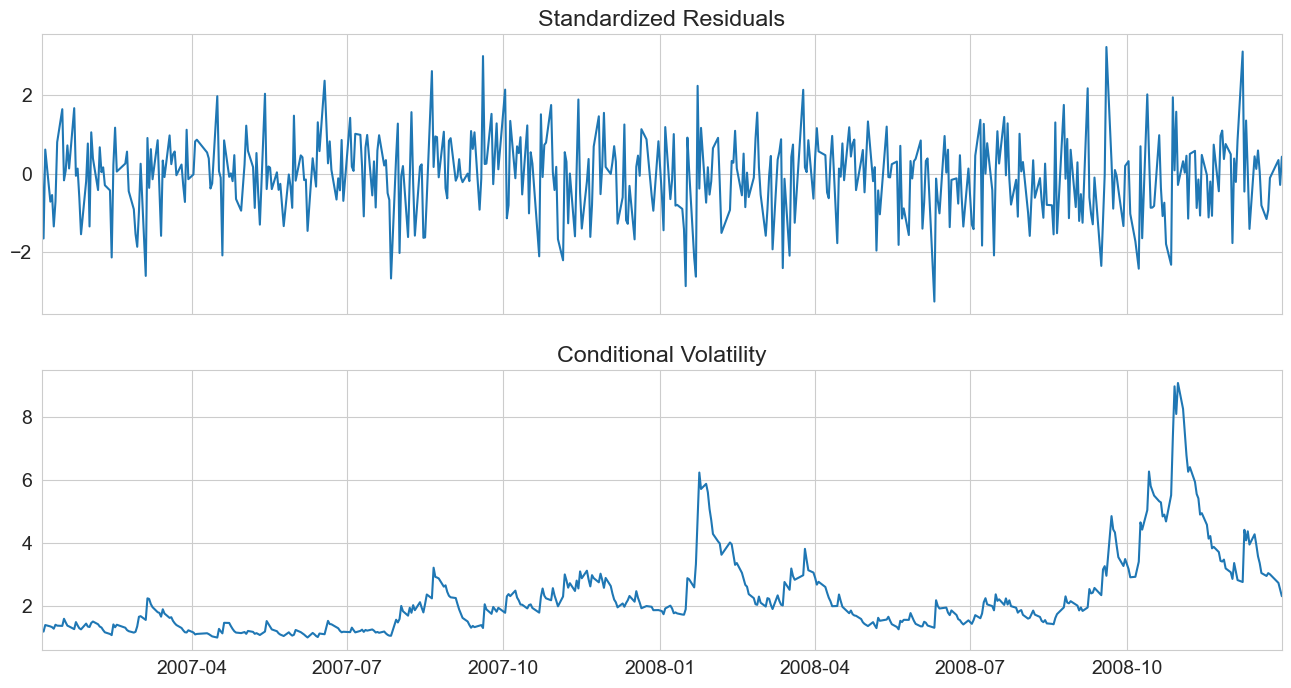

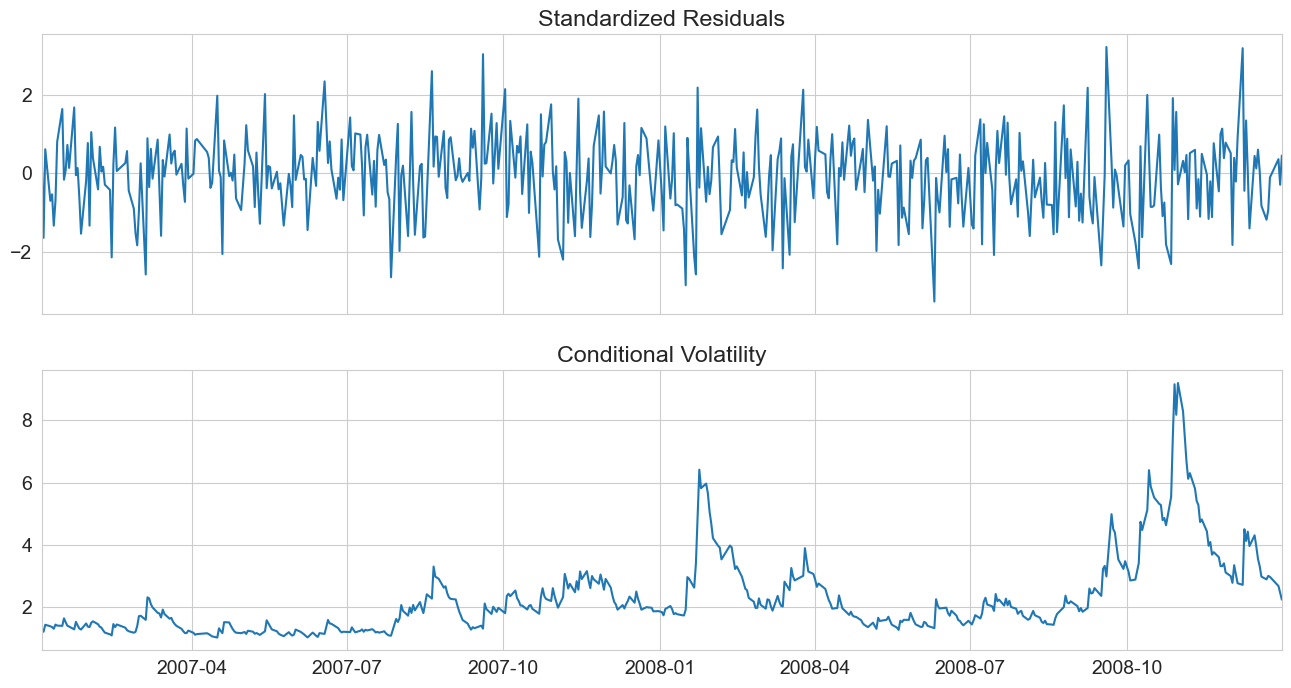

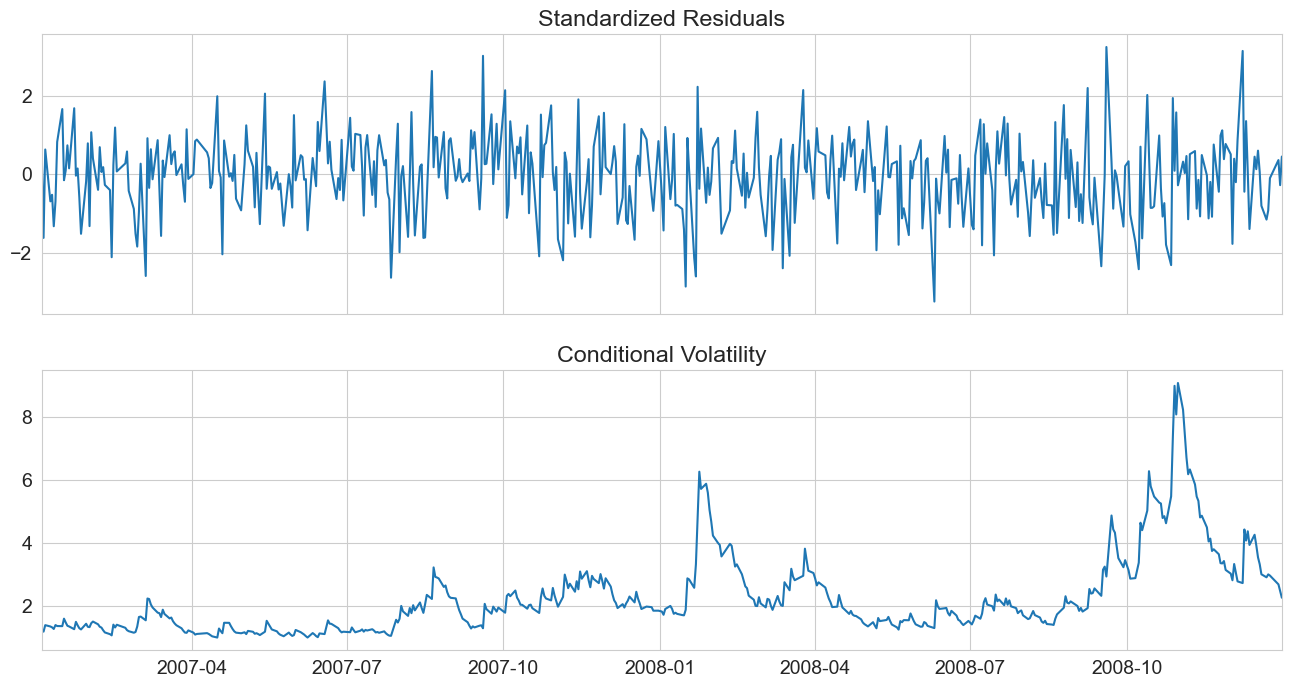

In [16]:
model_fit_t.plot()
model_fit_n.plot()
model_fit_skt.plot()

In [17]:
# Extract standardized residuals from each model fit
std_resid_t = model_fit_t.resid / model_fit_t.conditional_volatility
std_resid_n = model_fit_n.resid / model_fit_n.conditional_volatility
std_resid_skt = model_fit_skt.resid / model_fit_skt.conditional_volatility

# Calculate squared standardized residuals
sqrd_std_resid_t = std_resid_t ** 2
sqrd_std_resid_n = std_resid_n ** 2
sqrd_std_resid_skt = std_resid_skt ** 2

## Box Pierce Test (Lag 20)

### Standardised residuals (t, normal, skewt)

In [18]:
# Perform the Box-Pierce test for 20 lags on each model fit
bp_t = acorr_ljungbox(std_resid_t, lags=20, boxpierce=True)
bp_n = acorr_ljungbox(std_resid_n, lags=20, boxpierce=True)
bp_skt = acorr_ljungbox(std_resid_skt, lags=20, boxpierce=True)

# Print Box-Pierce test results
print("Box-Pierce Test Results (Student t (EHS)):")
print("Results:", bp_t)
print('-------------------------------------------------------------')
print("\nBox-Pierce Test Results (Normal):")
print("Results:", bp_n)
print('-------------------------------------------------------------')
print("\nBox-Pierce Test Results (Skewed t):")
print("Results:", bp_skt)

Box-Pierce Test Results (Student t (EHS)):
Results:       lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.498997   0.479941   0.495954   0.481283
2    0.610308   0.737010   0.606360   0.738466
3    0.807493   0.847674   0.801541   0.849098
4    0.812480   0.936767   0.806467   0.937579
5    2.083690   0.837448   2.059591   0.840840
6    2.159422   0.904468   2.134092   0.906962
7    2.809760   0.902026   2.772533   0.905217
8    4.068785   0.850865   4.005969   0.856585
9    4.085829   0.905673   4.022632   0.909917
10   4.750718   0.907196   4.671304   0.912027
11   4.934630   0.934291   4.850356   0.938196
12  12.064985   0.440475  11.777815   0.463685
13  12.192660   0.511913  11.901597   0.535729
14  12.222086   0.588473  11.930067   0.611919
15  12.457201   0.644145  12.157057   0.667104
16  12.708645   0.693929  12.399302   0.716066
17  13.917403   0.672940  13.561381   0.697870
18  14.299438   0.709373  13.927886   0.733780
19  17.112266   0.582262  16.620655   0.615550
20  17.1

### Squared standardised Residuals (t, normal, skewt)

In [19]:
# Perform the Box-Pierce test for 20 lags on each model fit
sq_bp_t = acorr_ljungbox(sqrd_std_resid_t, lags=20, boxpierce=True)
sq_bp_n = acorr_ljungbox(sqrd_std_resid_n, lags=20, boxpierce=True)
sq_bp_skt = acorr_ljungbox(sqrd_std_resid_skt, lags=20, boxpierce=True)

# Print Box-Pierce test results
print("Box-Pierce Test Results (Student t (EHS)):")
print("Results:", sq_bp_t)
print('-------------------------------------------------------------')
print("\nBox-Pierce Test Results (Normal):")
print("Results:", sq_bp_n)
print('-------------------------------------------------------------')
print("\nBox-Pierce Test Results (Skewed t):")
print("Results:", sq_bp_skt)

Box-Pierce Test Results (Student t (EHS)):
Results:       lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.985122   0.320937   0.979116   0.322417
2    1.007229   0.604342   1.001042   0.606215
3    4.996334   0.172066   4.949608   0.175525
4    6.557767   0.161187   6.491999   0.165295
5    6.575445   0.254177   6.509425   0.259754
6    7.457310   0.280616   7.376951   0.287389
7    9.048036   0.249226   8.938578   0.257096
8    9.084758   0.335196   8.974554   0.344447
9   10.145496   0.338835  10.011576   0.349549
10  11.992333   0.285570  11.813368   0.297741
11  12.537161   0.324649  12.343800   0.338363
12  12.608586   0.398120  12.413194   0.413092
13  14.089412   0.367577  13.848872   0.384573
14  14.116098   0.441098  13.874690   0.459088
15  15.700603   0.402224  15.404446   0.422696
16  15.723616   0.472411  15.426618   0.493642
17  17.600967   0.414422  17.231469   0.438794
18  18.109529   0.448459  17.719358   0.474279
19  18.276552   0.504042  17.879252   0.530517
20  19.3

## Training Phase (in-sample)

In [20]:
rolling_predictions = []
test_size = 489

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\farid\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\volatility.py:1197: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.mean(resids**2) / (target ** (2.0 / power))
C:\Users\farid\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\distribution.py:451: RuntimeWarning: divide by zero encountered in log
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\farid\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\distribution.py:451: RuntimeWarning: invalid value encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\farid\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\distribution.py:451: RuntimeWarning: divide by zero encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\farid\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univaria

In [21]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-489:])

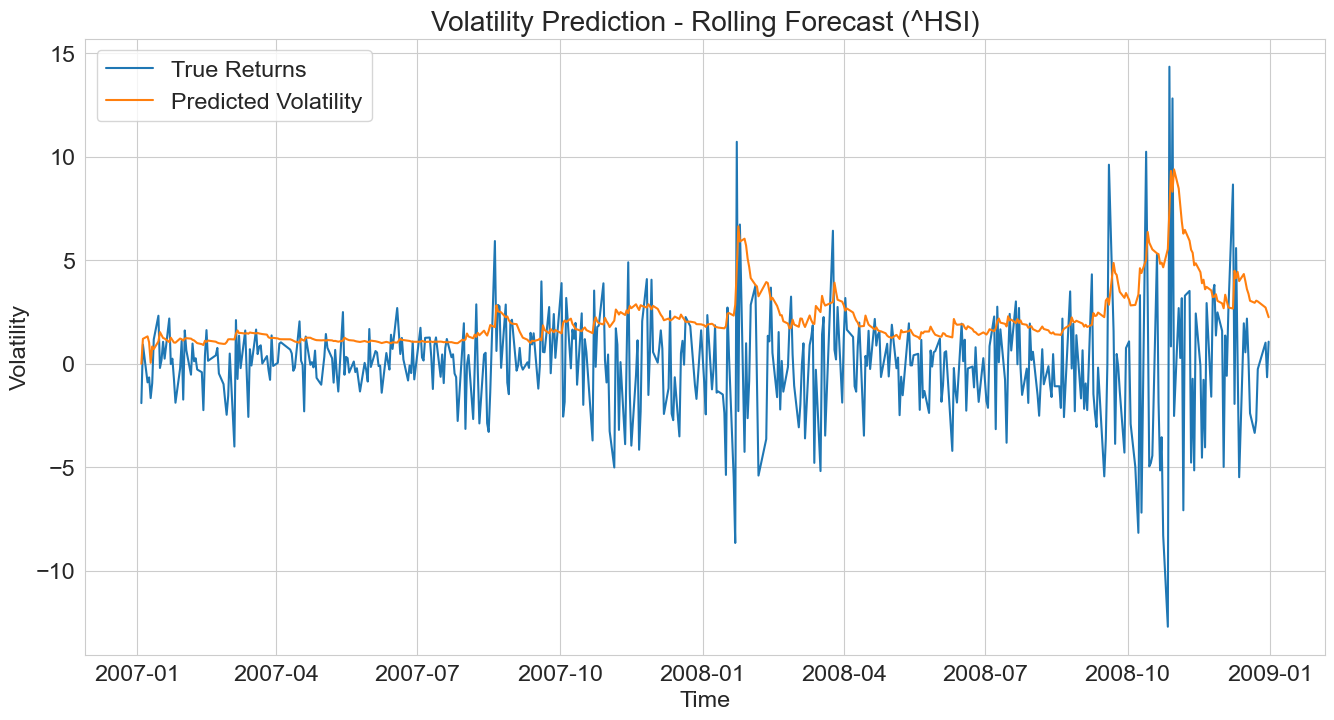

In [22]:
plt.rcParams.update({'font.size': 16.8})

true, = plt.plot(returns[-489:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast (^HSI)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend(['True Returns', 'Predicted Volatility'])
plt.savefig('Volatility_Comparison_HSI.png')

## Testing Phase (Out of Sample)

In [23]:
tickers = '^HSI'
oos_start_date = '2009-01-01'
oos_end_date = '2011-01-01'
oos_data = yf.download(tickers, start=oos_start_date, end=oos_end_date)

[*********************100%%**********************]  1 of 1 completed


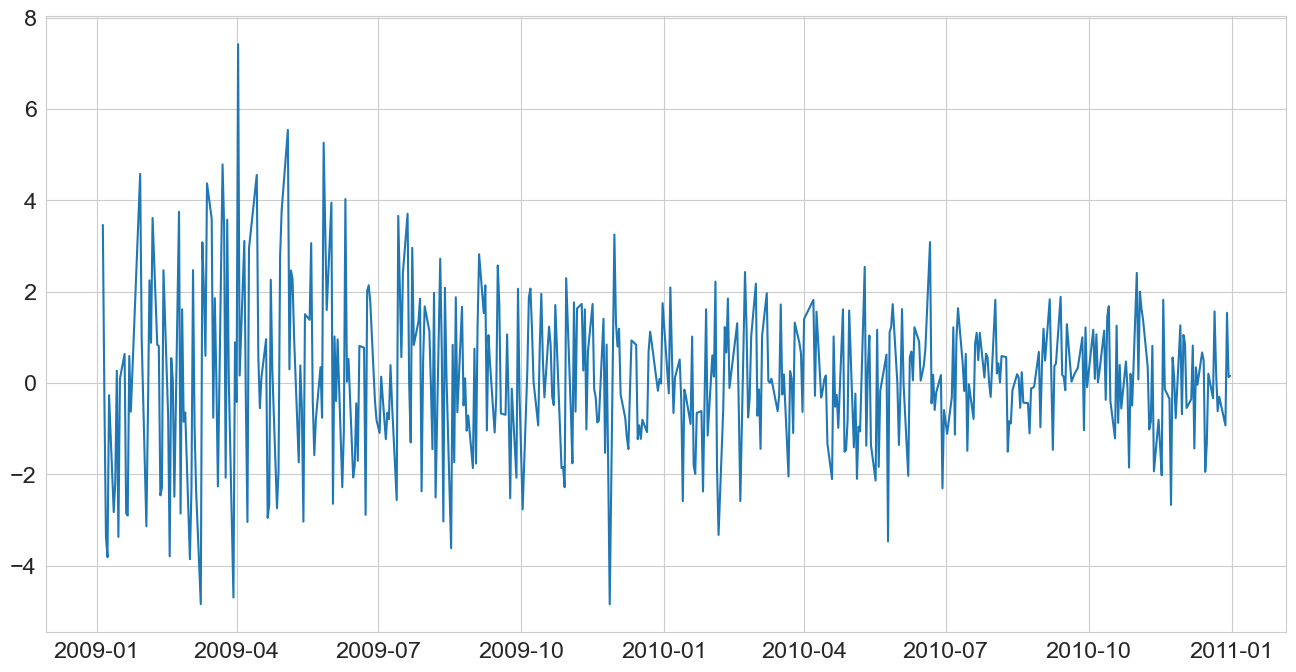

In [24]:
oos_returns = 100 * oos_data['Close'].ffill().pct_change().dropna()
plt.plot(oos_returns)

In [25]:
oos_rolling_predictions = []

for i in range(len(oos_returns)):
    test = oos_returns[:i]
    if len(test) > 1:  
        test = test.dropna()  
        model = arch_model(test, p=1, q=1, dist='t')
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        oos_rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))
    else:
        oos_rolling_predictions.append(np.nan)  

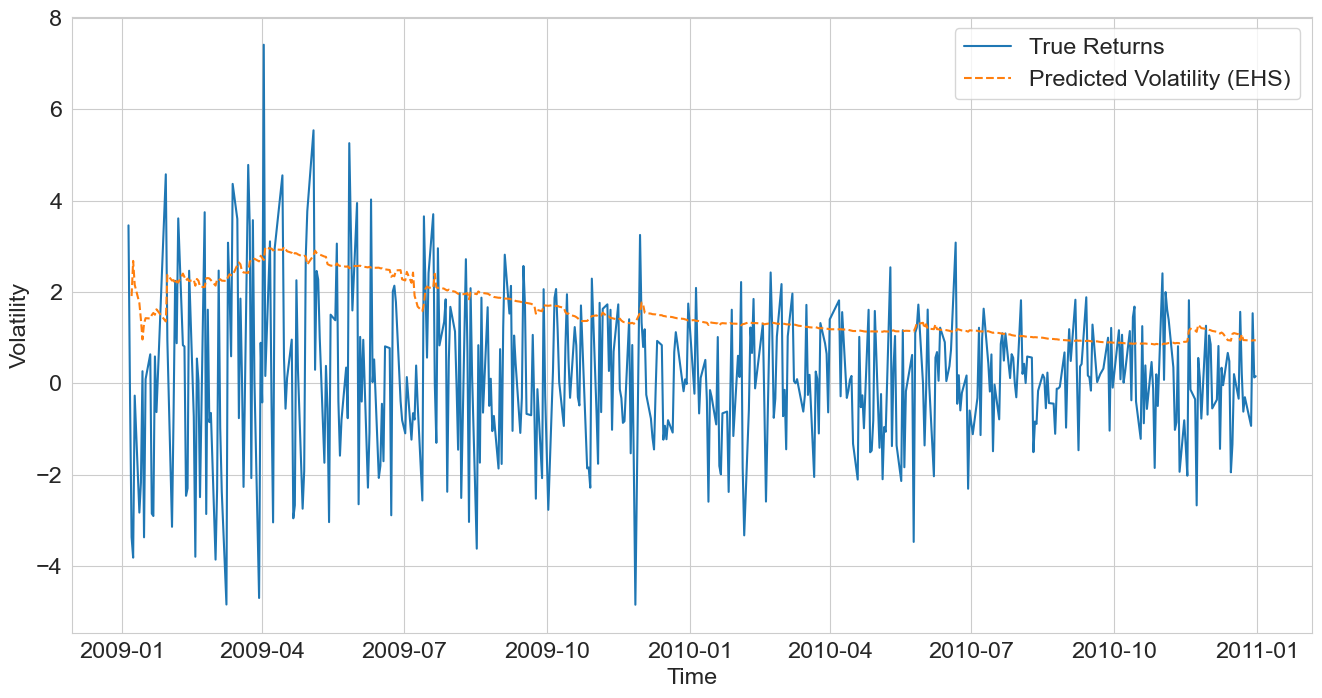

In [26]:
plt.plot(oos_returns[-len(oos_rolling_predictions):].index, oos_returns[-len(oos_rolling_predictions):])
plt.plot(oos_returns[-len(oos_rolling_predictions):].index, oos_rolling_predictions, linestyle='--')

plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend(['True Returns', 'Predicted Volatility (EHS)'])
plt.savefig('OOS_Rolling_Window_HSI.png')
plt.show()